Dataset Statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      0.226180    0.501205       0.493930       0.240798    0.170130   
std       0.198210    0.196361       0.123432       0.095554    0.102189   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       0.058824    0.359677       0.408163       0.195652    0.129207   
50%       0.176471    0.470968       0.491863       0.240798    0.170130   
75%       0.352941    0.620968       0.571429       0.271739    0.170130   
max       1.000000    1.000000       1.000000       1.000000    1.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean     0.291564                  0.168179    0.204015    0.348958  
std      0.140596                  0.141473    0.196004    0.476951  
min      0.000

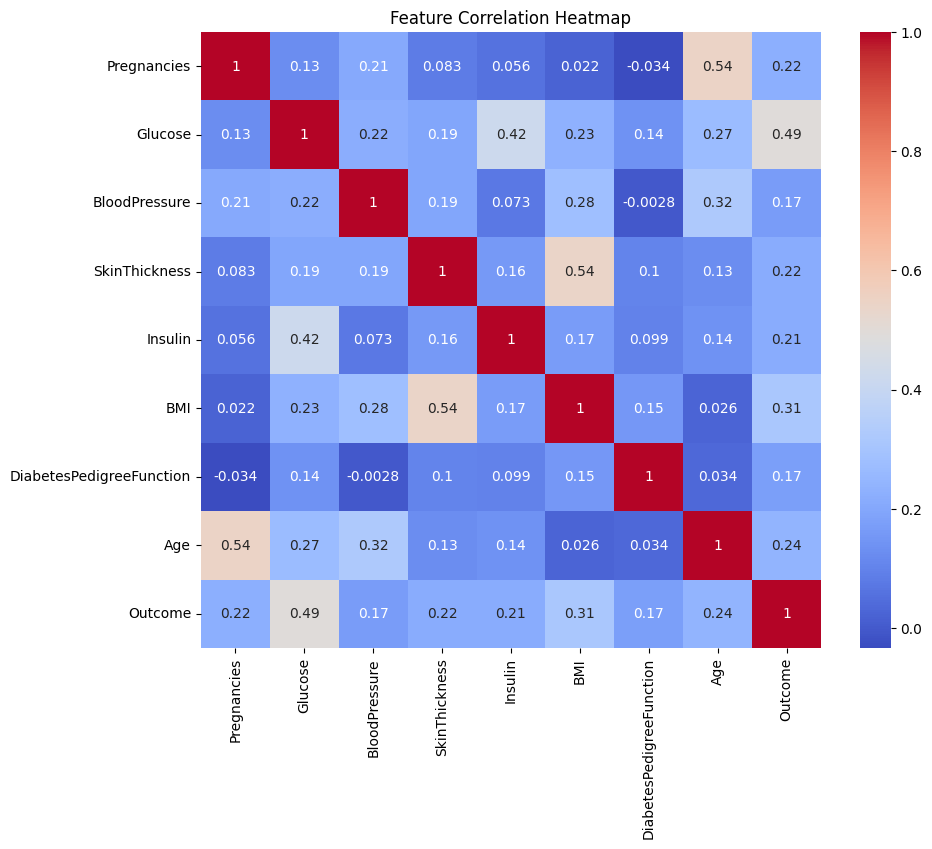

Logistic Regression Accuracy: 0.78
Random Forest Accuracy: 0.75
Better model: Logistic Regression


In [ ]:
# ===========================
# Disease Prediction ML Workflow
# ===========================

# Step 1: Load Dataset
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
data = pd.read_csv(url, names=columns)

# Step 2: Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Replace zeros with NaN for selected columns
cols_with_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
data[cols_with_zero] = data[cols_with_zero].replace(0, np.nan)

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
data[cols_with_zero] = imputer.fit_transform(data[cols_with_zero])

# Normalize numerical columns
scaler = MinMaxScaler()
data[columns[:-1]] = scaler.fit_transform(data[columns[:-1]])

# Step 3: Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

print("Dataset Statistics:\n", data.describe())

plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Step 4: Model Training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

# Step 5: Compare Models
print(f"Logistic Regression Accuracy: {acc_lr:.2f}")
print(f"Random Forest Accuracy: {acc_rf:.2f}")

best_model = "Random Forest" if acc_rf > acc_lr else "Logistic Regression"
print(f"Better model: {best_model}")
